# Exploratory Data Analysis

This notebook will be used to explore and better visualize the Airbnb data provided for the assignment.

## Importing the Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from category_encoders.target_encoder import TargetEncoder
from category_encoders.cat_boost import CatBoostEncoder
from scipy import stats
from utils import *

## Importing the train and test data

In [2]:
df_train = pd.read_csv('train.csv')

df_test = pd.read_csv('test.csv')

## Detailing the Data Content

In [3]:
df_train.dtypes

property_id                   int64
property_name                object
property_summary             object
property_space               object
property_desc                object
property_neighborhood        object
property_notes               object
property_transit             object
property_access              object
property_interaction         object
property_rules               object
property_zipcode             object
property_lat                float64
property_lon                float64
property_type                object
property_room_type           object
property_max_guests           int64
property_bathrooms          float64
property_bedrooms           float64
property_beds               float64
property_bed_type            object
property_amenities           object
property_sqfeet             float64
property_scraped_at          object
property_last_updated        object
host_id                       int64
host_since                   object
host_location               

In [4]:
df_train.isna().sum()

property_id                    0
property_name                 24
property_summary             212
property_space              2309
property_desc                  3
property_neighborhood       2811
property_notes              4522
property_transit            2580
property_access             3135
property_interaction        3404
property_rules              3169
property_zipcode             134
property_lat                   0
property_lon                   0
property_type                  0
property_room_type             0
property_max_guests            0
property_bathrooms            12
property_bedrooms              9
property_beds                 11
property_bed_type              0
property_amenities            52
property_sqfeet             6333
property_scraped_at            0
property_last_updated          0
host_id                        0
host_since                     1
host_location                 33
host_about                  3107
host_response_time          1461
host_respo

In [5]:
df_train.isna().sum()

property_id                    0
property_name                 24
property_summary             212
property_space              2309
property_desc                  3
property_neighborhood       2811
property_notes              4522
property_transit            2580
property_access             3135
property_interaction        3404
property_rules              3169
property_zipcode             134
property_lat                   0
property_lon                   0
property_type                  0
property_room_type             0
property_max_guests            0
property_bathrooms            12
property_bedrooms              9
property_beds                 11
property_bed_type              0
property_amenities            52
property_sqfeet             6333
property_scraped_at            0
property_last_updated          0
host_id                        0
host_since                     1
host_location                 33
host_about                  3107
host_response_time          1461
host_respo

C:\Users\guibl\AppData\Local\Temp\ipykernel_36684\2136098350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="seismic")


<Axes: >

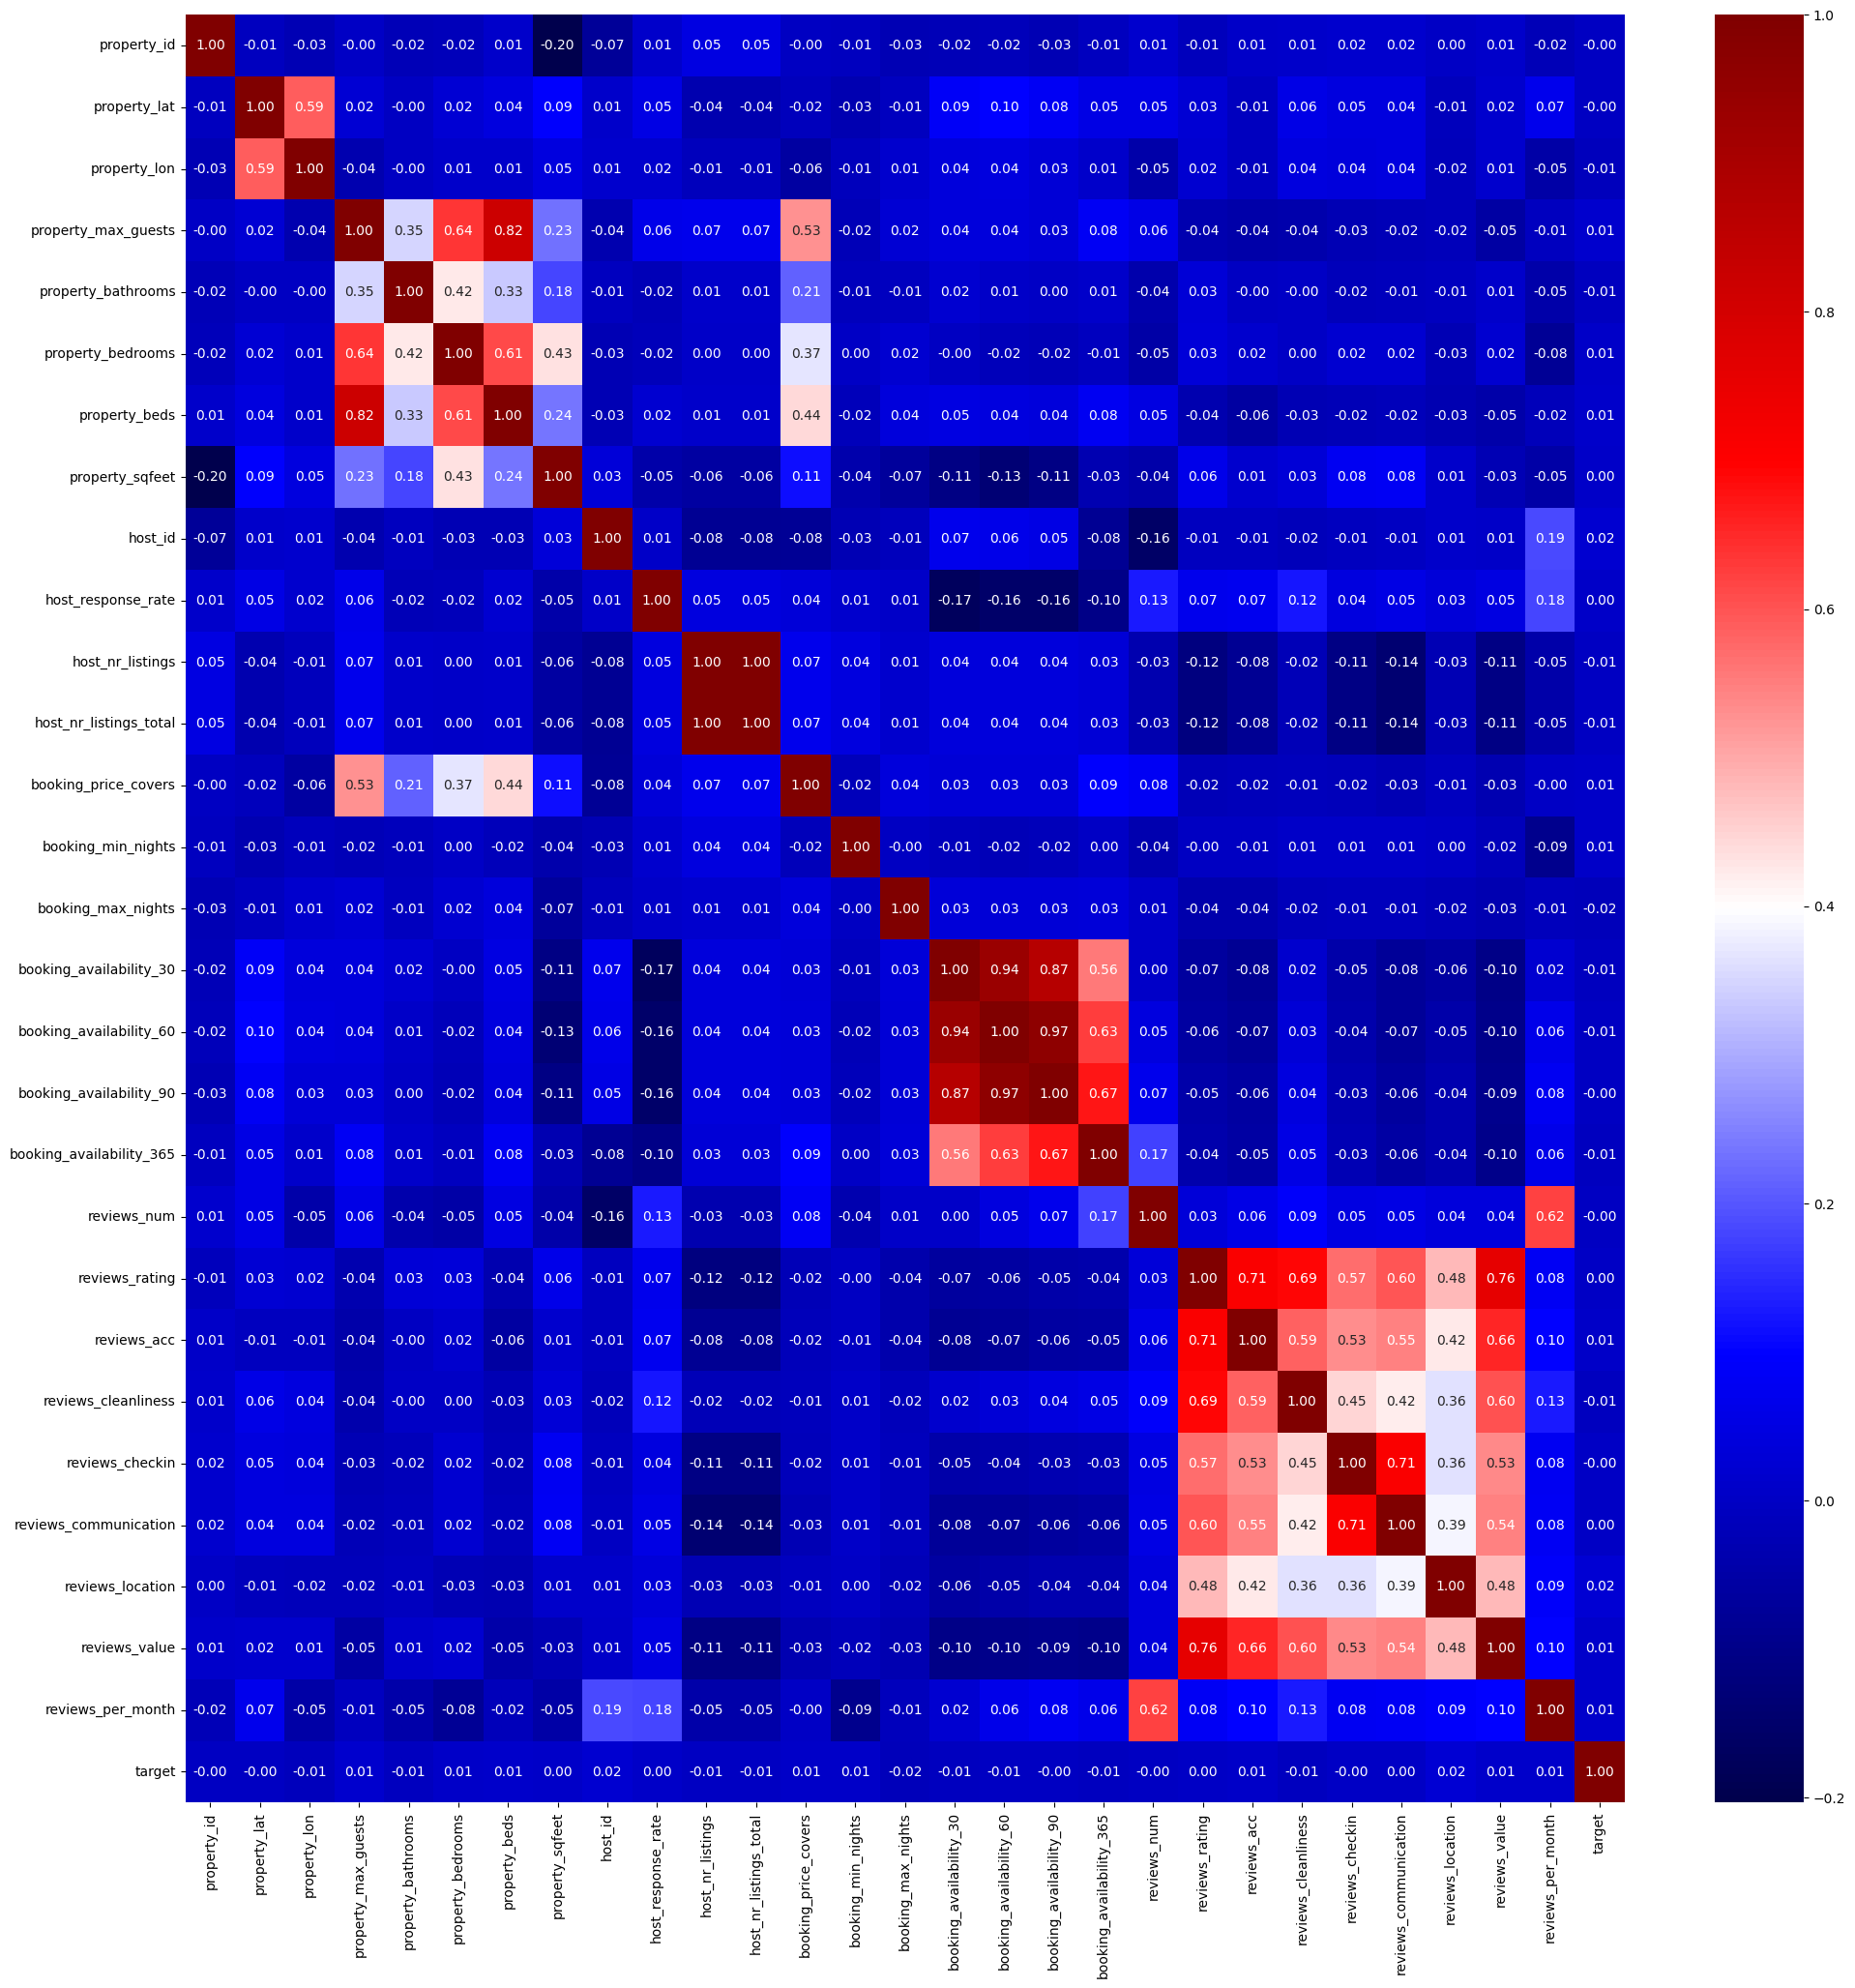

In [6]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="seismic")

---
## Analysing the Target Variable

We will check the distribution of the target variable to determine the best transformation for it, if a transformation is necessary.

<Axes: xlabel='target', ylabel='Count'>

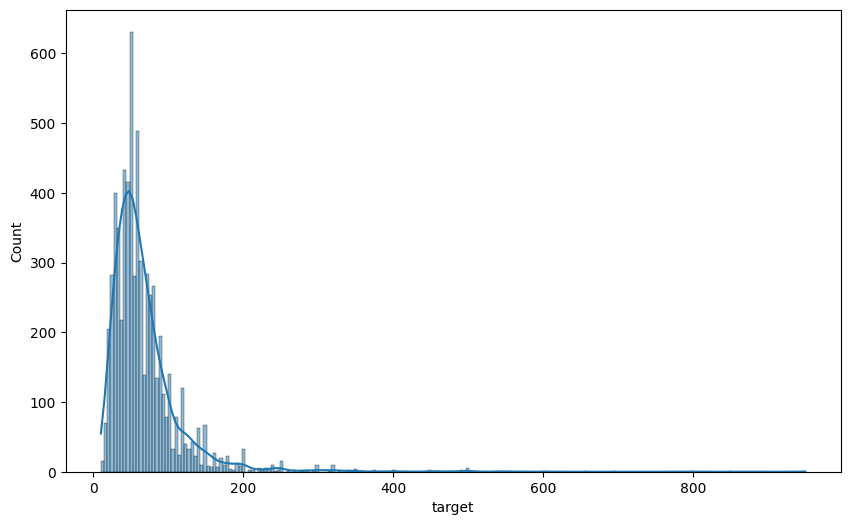

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(x='target', data=df_train, kde=True)

In [8]:
df_train[['target']].describe()

,target
count,6495.000000
mean,67.899923
std,51.910478
min,10.000000
25%,40.000000
50%,55.000000
75%,80.000000
max,950.000000


<Axes: ylabel='target'>

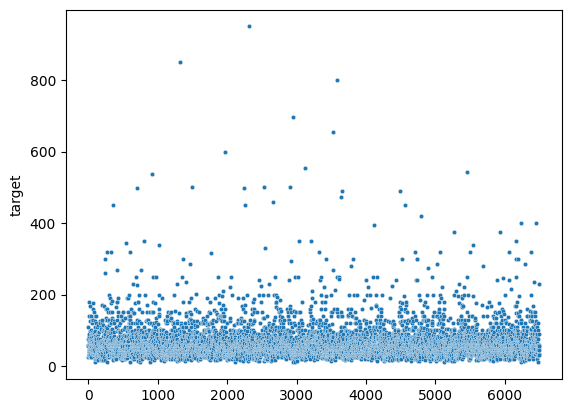

In [9]:
sns.scatterplot(data=df_train, y='target', x=range(df_train.shape[0]), s=10)

In [10]:
np.percentile(df_train.target, q=99)

250.53999999999542

In [11]:
(df_train.target > 250).sum()

65

In [12]:
#df_train = df_train[df_train.target < np.percentile(df_train.target, q=99)]

As it can be seen, the target data is still skewed to the left, so a transformation is appropriate. In this case, a log transformation should unskew the data distribution, so it will be applied.

In [13]:
df_train['target_log'] = np.log(df_train['target'])

<Axes: xlabel='target_log', ylabel='Count'>

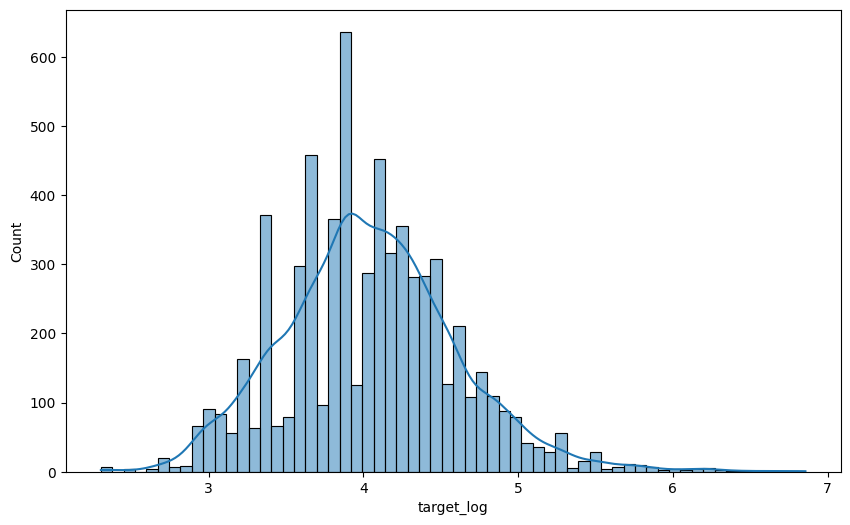

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(x='target_log', data=df_train, kde=True)

In [15]:
df_train[['target_log']].describe()

,target_log
count,6495.000000
mean,4.044467
std,0.561034
min,2.302585
25%,3.688879
50%,4.007333
75%,4.382027
max,6.856462


<Axes: xlabel='target_log'>

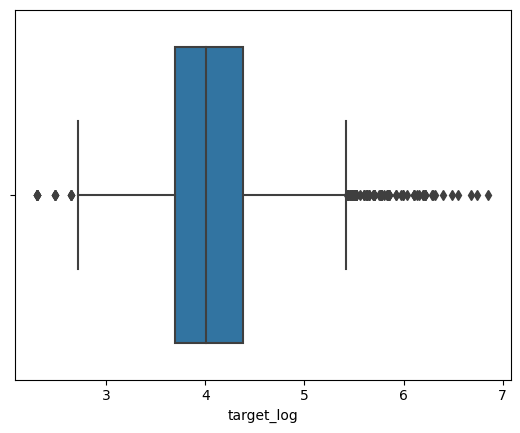

In [16]:
sns.boxplot(data=df_train, x='target_log')

In [17]:
np.percentile(df_train.target_log, q=99.5)

5.8289456176102075

In [18]:
scaler = StandardScaler()

In [19]:
df_train['target_std_log'] = scaler.fit_transform(df_train[['target_log']])

<Axes: xlabel='target_std_log', ylabel='Count'>

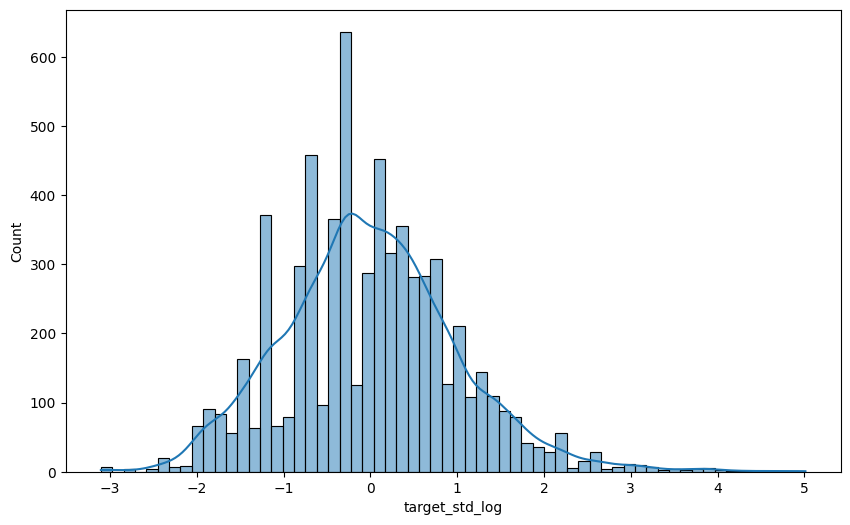

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(x='target_std_log', data=df_train, kde=True)

<Axes: ylabel='target_std_log'>

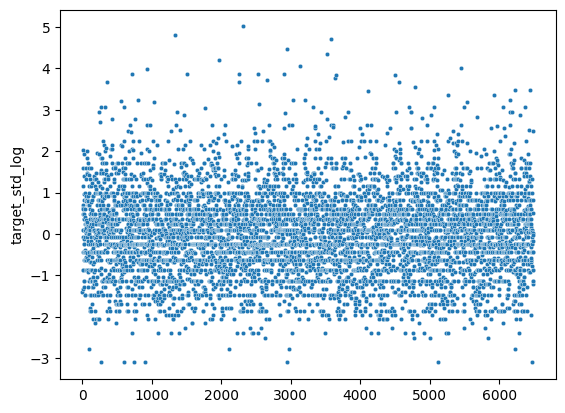

In [21]:
sns.scatterplot(data=df_train, y='target_std_log', x=range(df_train.shape[0]), s=10)

In [22]:
(np.abs(df_train.target_std_log) > 2.0).sum()

282

In [23]:
df_train = df_train[np.abs(df_train.target_std_log) <= 2.0]

C:\Users\guibl\AppData\Local\Temp\ipykernel_36684\2136098350.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="seismic")


<Axes: >

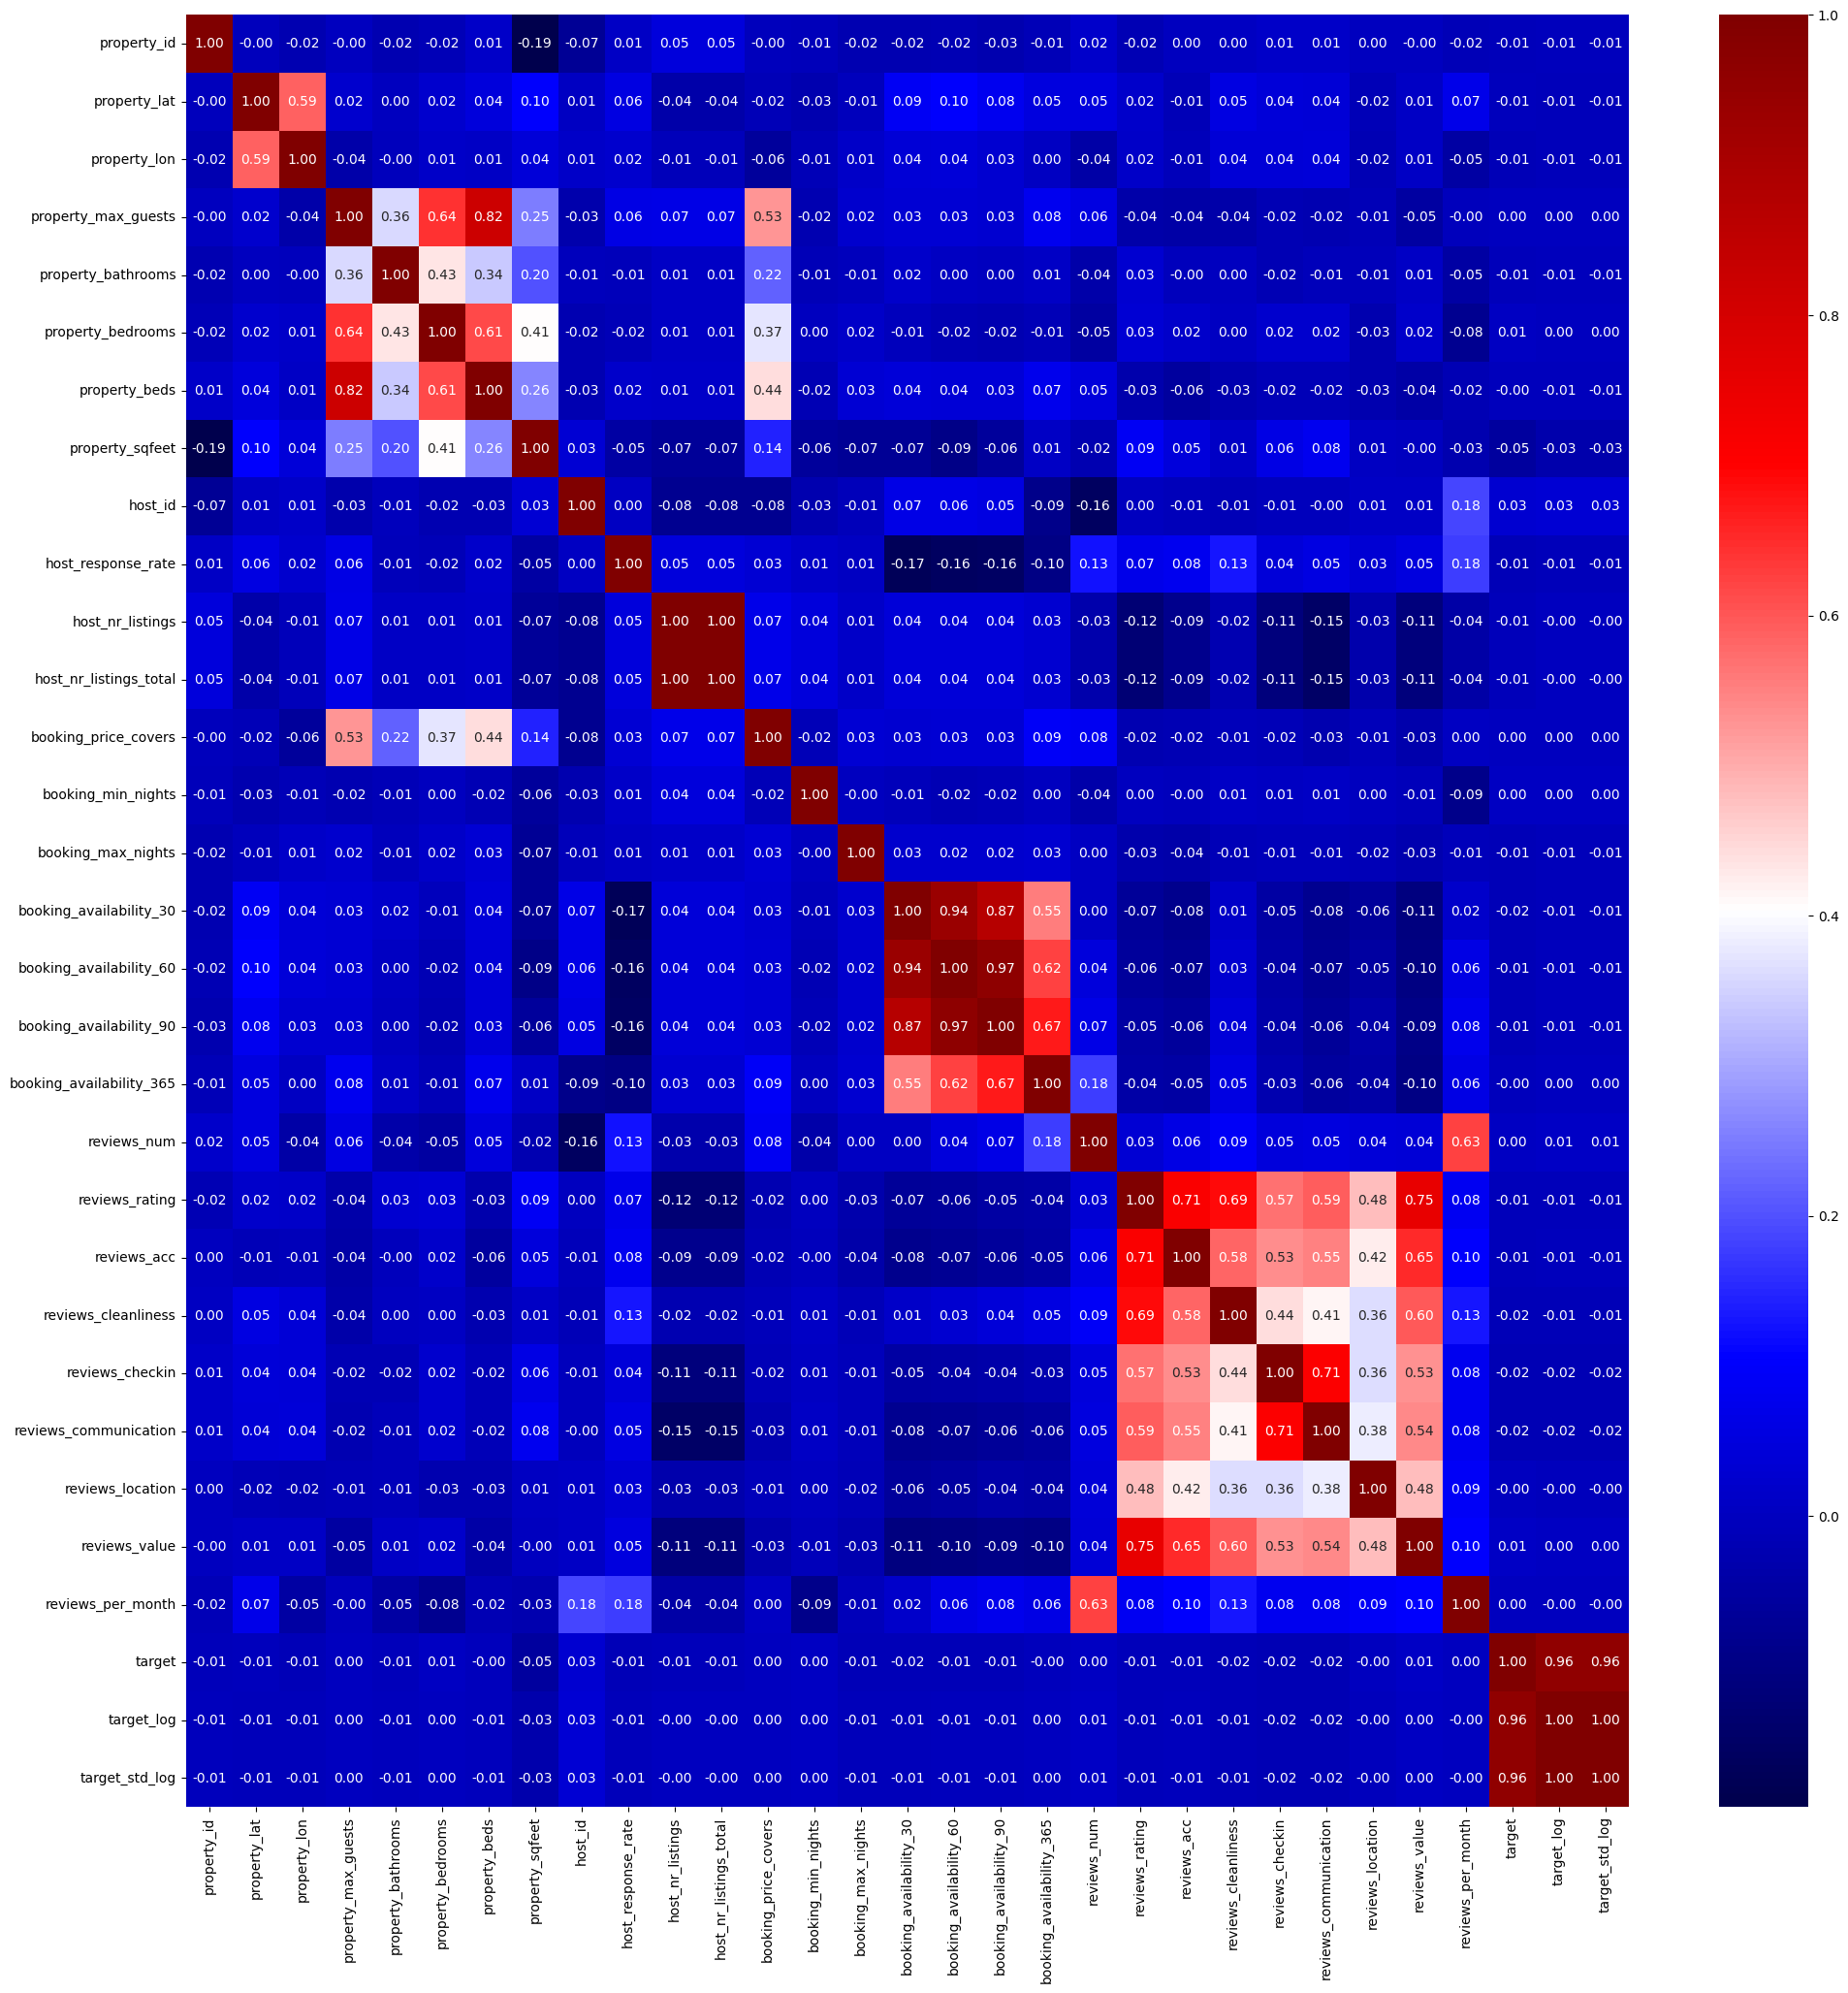

In [24]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="seismic")

For this case, the target variable will be log transformed in order to remove skewness, and standardized so that some models can have a better performance with the prediction.

---
## Property Beds, Max Guests, Bedrooms and Bathrooms 

### property_beds

In [25]:
df_train.property_beds.value_counts()

1.0     3641
2.0     1562
3.0      537
4.0      251
5.0       87
6.0       64
8.0       22
7.0       14
16.0      13
9.0        4
13.0       3
10.0       2
12.0       2
14.0       1
Name: property_beds, dtype: int64

In [26]:
(df_train.property_beds > 6).sum()

61

<Axes: xlabel='property_beds'>

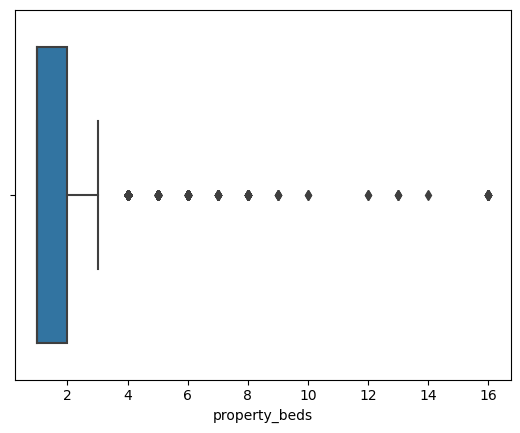

In [27]:
sns.boxplot(data=df_train, x='property_beds')

<Axes: xlabel='property_beds', ylabel='target_log'>

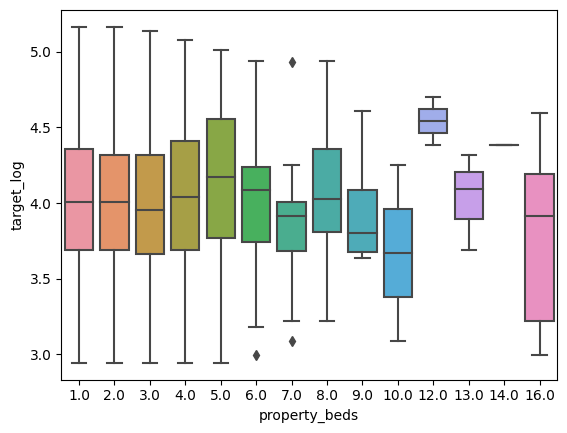

In [28]:
sns.boxplot(data=df_train, x='property_beds', y='target_log')

In [29]:
bins = [0,1,2,3,4,5,6,50]
labels = ['1', '2', '3', '4', '5', '6', '7+']
df_train['property_beds_cats'] = pd.cut(df_train.property_beds, bins=bins, labels=labels)

In [30]:
df_train['property_beds_cats'] = np.where(df_train.property_beds_cats.isna(), '1', df_train.property_beds_cats)

In [31]:
df_train['property_beds_cats'].value_counts()

1     3651
2     1562
3      537
4      251
5       87
6       64
7+      61
Name: property_beds_cats, dtype: int64

In [32]:
enc = TargetEncoder(cols=['property_beds_cats'], min_samples_leaf=100, smoothing=100, handle_missing='value').fit(df_train.drop(columns=['target', 'target_std_log', 'target_log']), df_train['target_std_log'])

check = enc.transform(df_train.drop(columns=['target', 'target_std_log', 'target_log']))

df_train['property_beds_cats'] = check['property_beds_cats']

In [33]:
df_train[['property_beds_cats', 'property_beds']] = check[['property_beds_cats', 'property_beds']]

In [34]:
df_train['property_beds_cats'].value_counts()

-0.054645    3651
-0.036560    1562
-0.113048     537
-0.021031     251
 0.033673      87
-0.074905      64
-0.098969      61
Name: property_beds_cats, dtype: int64

<Axes: xlabel='property_beds_cats', ylabel='target_log'>

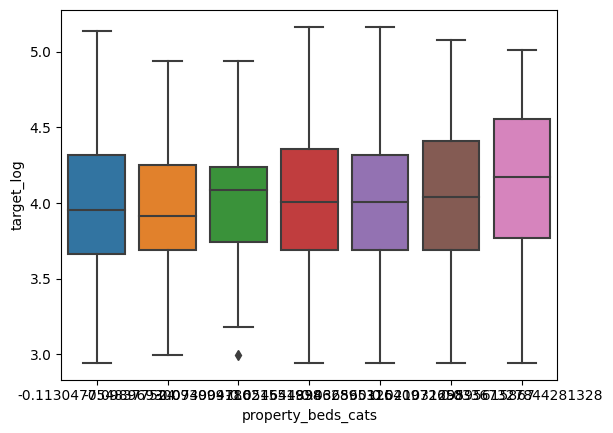

In [35]:
sns.boxplot(data=check, x='property_beds_cats', y=df_train['target_log'])

### property_max_guests

In [36]:
df_train.property_max_guests.value_counts()

2     3125
4     1257
3      571
1      465
6      335
5      266
8       64
7       54
10      26
16      25
9       12
12       9
11       2
13       1
15       1
Name: property_max_guests, dtype: int64

<Axes: xlabel='property_max_guests'>

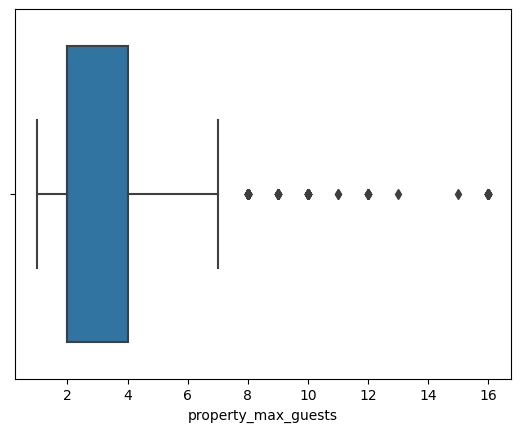

In [37]:
sns.boxplot(data=df_train, x='property_max_guests')

<Axes: xlabel='property_max_guests', ylabel='target_log'>

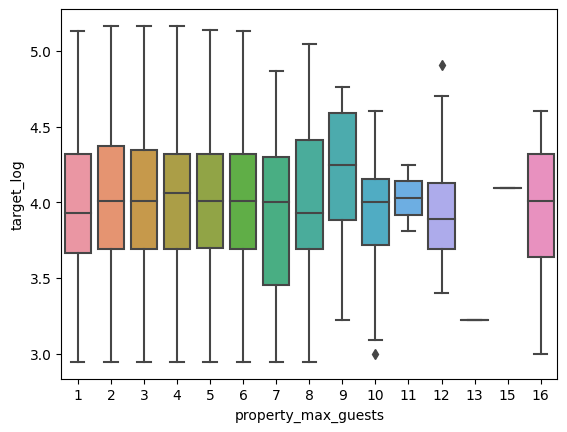

In [38]:
sns.boxplot(data=df_train, x='property_max_guests', y='target_log')

<Axes: xlabel='property_beds', ylabel='property_max_guests'>

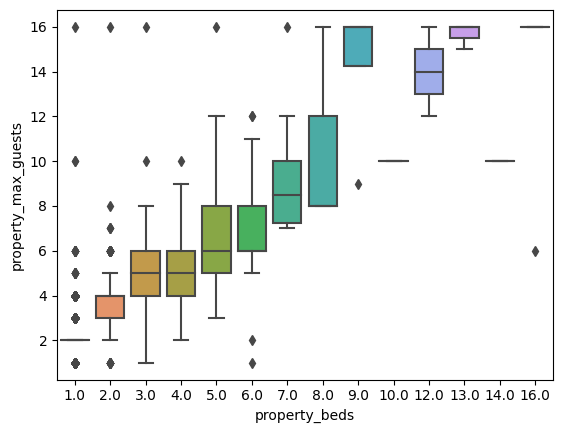

In [39]:
sns.boxplot(data=df_train, x='property_beds', y='property_max_guests')

This data of Max guests and property beds is not coherent with reality, as the max guests number should be between 1x and 2x the amount of beds (considering the worst case of all beds being single and best case of all beds being double).

We can adjust the values of max guests to fit with the expected values

In [40]:
df_train['property_max_guests'] = np.where(df_train.property_max_guests < df_train.property_beds, df_train.property_beds, df_train.property_max_guests)

df_train['property_max_guests'] = np.where(df_train.property_max_guests > 2*df_train.property_beds, 2*df_train.property_beds, df_train.property_max_guests)


<Axes: xlabel='property_beds', ylabel='property_max_guests'>

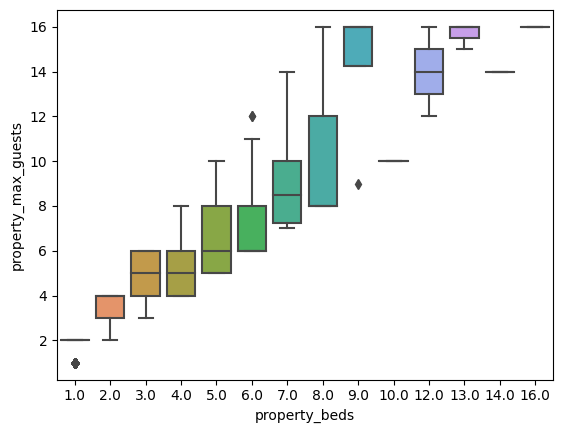

In [41]:
sns.boxplot(data=df_train, x='property_beds', y='property_max_guests')

<Axes: xlabel='property_max_guests', ylabel='target_log'>

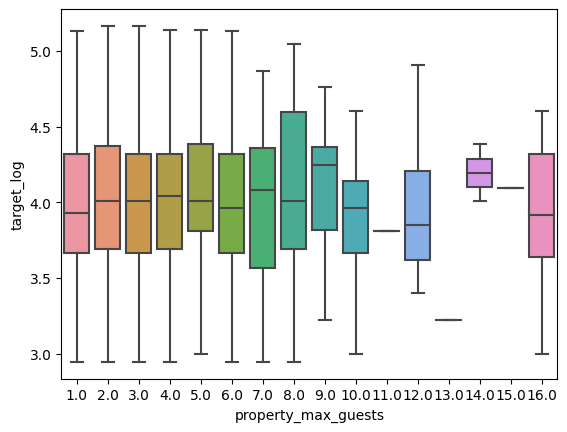

In [42]:
sns.boxplot(data=df_train, x='property_max_guests', y='target_log')

In [43]:
df_train['property_max_guests'].value_counts()

2.0     3541
4.0     1166
1.0      449
3.0      387
6.0      292
5.0      203
8.0       61
7.0       46
10.0      24
16.0      21
9.0       10
12.0       8
14.0       2
13.0       1
15.0       1
11.0       1
Name: property_max_guests, dtype: int64

In [44]:
bins = [0,1,2,3,4,5,6,25]
labels = ['1', '2', '3', '4', '5', '6', '7+']
df_train['property_maxguest_cats'] = pd.cut(df_train.property_max_guests, bins=bins, labels=labels)

In [45]:
df_train['property_maxguest_cats'].value_counts()

2     3541
4     1166
1      449
3      387
6      292
5      203
7+     175
Name: property_maxguest_cats, dtype: int64

In [46]:
enc2 = TargetEncoder(cols=['property_maxguest_cats'], min_samples_leaf=100, smoothing=100).fit(df_train.drop(columns=['target', 'target_std_log', 'target_log']), df_train['target_std_log'])

check = enc2.transform(df_train.drop(columns=['target', 'target_std_log', 'target_log']))

df_train['property_maxguest_cats'] = check['property_maxguest_cats']

In [47]:
df_train['property_maxguest_cats'].value_counts()

-0.046860    3541
-0.039036    1166
-0.112033     449
-0.081139     387
-0.098662     292
 0.018497     203
-0.057138     175
Name: property_maxguest_cats, dtype: int64

<Axes: xlabel='property_maxguest_cats', ylabel='target_std_log'>

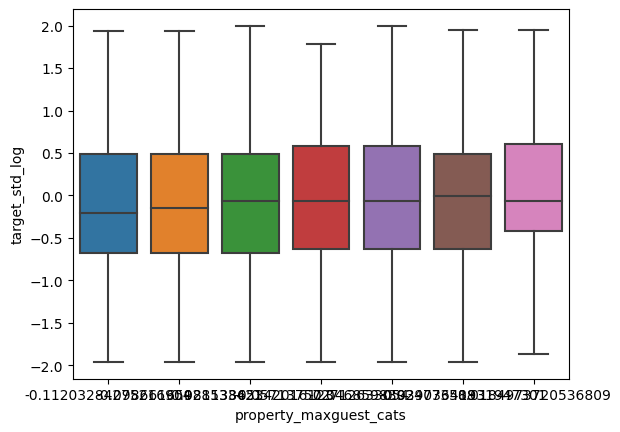

In [48]:
sns.boxplot(data=df_train, x='property_maxguest_cats', y='target_std_log')

### property_bedrooms

In [49]:
df_train.property_bedrooms.value_counts()

1.0    4283
2.0    1032
0.0     555
3.0     234
4.0      70
5.0      19
6.0       7
8.0       2
7.0       2
Name: property_bedrooms, dtype: int64

<Axes: xlabel='property_bedrooms'>

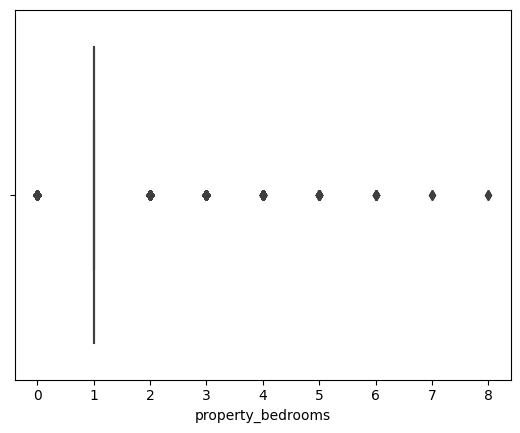

In [50]:
sns.boxplot(data=df_train, x='property_bedrooms')

<Axes: xlabel='property_bedrooms', ylabel='target_log'>

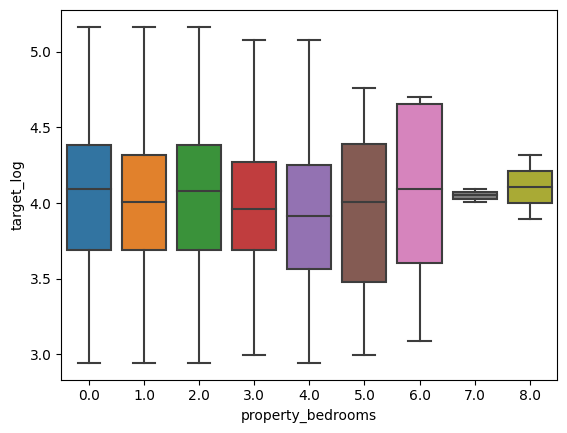

In [51]:
sns.boxplot(data=df_train, x='property_bedrooms', y='target_log')

In [52]:
df_train['property_bedrooms'].value_counts()

1.0    4283
2.0    1032
0.0     555
3.0     234
4.0      70
5.0      19
6.0       7
8.0       2
7.0       2
Name: property_bedrooms, dtype: int64

In [53]:
bins = [-1,0,1,2,3,25]
labels = ['0', '1', '2', '3', '4+']
df_train['property_bedrooms_cats'] = pd.cut(df_train.property_bedrooms, bins=bins, labels=labels)

In [54]:
df_train['property_bedrooms_cats'].value_counts()

1     4283
2     1032
0      555
3      234
4+     100
Name: property_bedrooms_cats, dtype: int64

In [55]:
enc2 = TargetEncoder(cols=['property_bedrooms_cats'], min_samples_leaf=100, smoothing=100).fit(df_train.drop(columns=['target', 'target_std_log', 'target_log']), df_train['target_std_log'])

check = enc2.transform(df_train.drop(columns=['target', 'target_std_log', 'target_log']))

df_train['property_bedrooms_cats'] = check['property_bedrooms_cats']

In [56]:
df_train['property_bedrooms_cats'].value_counts()

-0.067487    4283
 0.014128    1032
-0.019911     555
-0.099175     234
-0.084401     100
-0.159901       9
Name: property_bedrooms_cats, dtype: int64

<Axes: xlabel='property_bedrooms_cats', ylabel='target_std_log'>

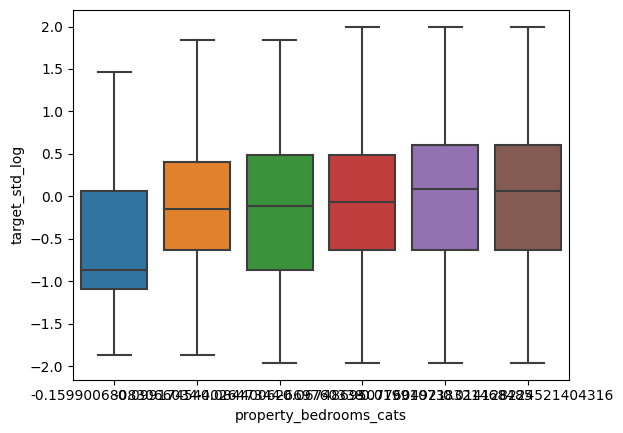

In [57]:
sns.boxplot(data=df_train, x='property_bedrooms_cats', y='target_std_log')

### booking_price_covers

In [58]:
df_train.booking_price_covers.value_counts()

1     4470
2     1316
4      234
3      114
6       31
5       29
8        7
10       3
16       3
9        2
7        1
13       1
11       1
15       1
Name: booking_price_covers, dtype: int64

<Axes: xlabel='booking_price_covers'>

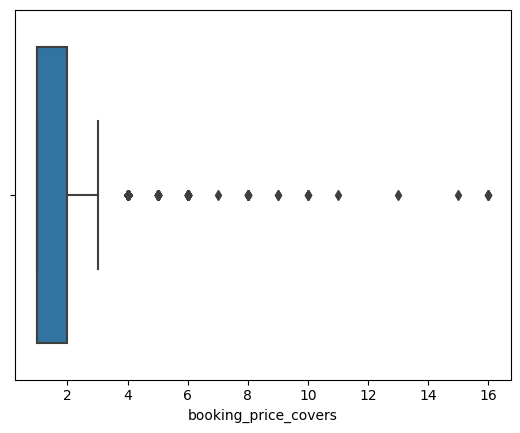

In [59]:
sns.boxplot(data=df_train, x='booking_price_covers')

<Axes: xlabel='booking_price_covers', ylabel='target_log'>

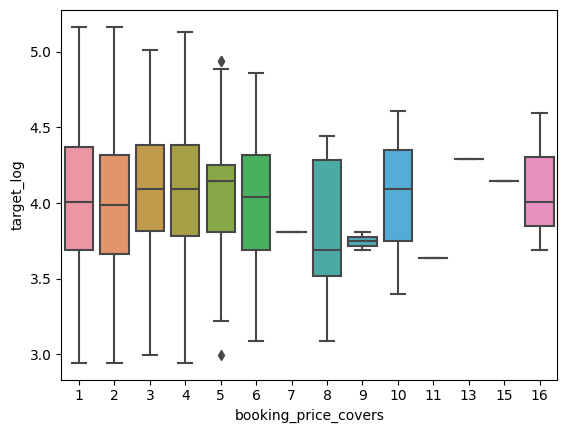

In [60]:
sns.boxplot(data=df_train, x='booking_price_covers', y='target_log')

In [61]:
df_train['booking_price_covers'].value_counts()

1     4470
2     1316
4      234
3      114
6       31
5       29
8        7
10       3
16       3
9        2
7        1
13       1
11       1
15       1
Name: booking_price_covers, dtype: int64

In [62]:
bins = [0,1,2,3,25]
labels = ['1', '2', '3', '4+']
df_train['booking_price_covers_cats'] = pd.cut(df_train.booking_price_covers, bins=bins, labels=labels)

In [63]:
df_train['booking_price_covers_cats'].value_counts()

1     4470
2     1316
4+     313
3      114
Name: booking_price_covers_cats, dtype: int64

In [64]:
enc2 = TargetEncoder(cols=['booking_price_covers_cats'], min_samples_leaf=100, smoothing=100).fit(df_train.drop(columns=['target', 'target_std_log', 'target_log']), df_train['target_std_log'])

check = enc2.transform(df_train.drop(columns=['target', 'target_std_log', 'target_log']))

df_train['booking_price_covers_cats'] = check['booking_price_covers_cats']

In [65]:
df_train['booking_price_covers_cats'].value_counts()

-0.045354    4470
-0.099695    1316
 0.002250     313
-0.004046     114
Name: booking_price_covers_cats, dtype: int64

<Axes: xlabel='booking_price_covers_cats', ylabel='target_std_log'>

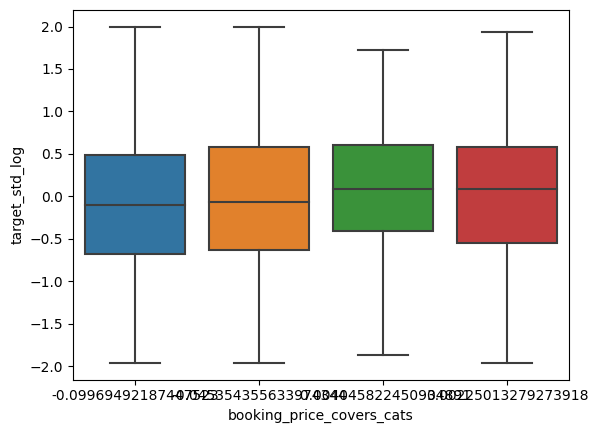

In [66]:
sns.boxplot(data=df_train, x='booking_price_covers_cats', y='target_std_log')

### property_bathrooms

<Axes: xlabel='property_bathrooms'>

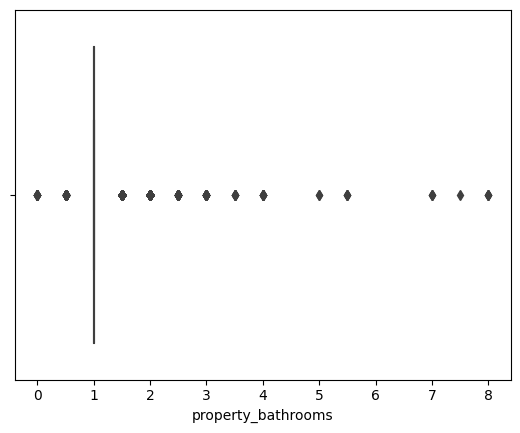

In [67]:
sns.boxplot(data=df_train, x='property_bathrooms')

<Axes: xlabel='property_bathrooms', ylabel='target_log'>

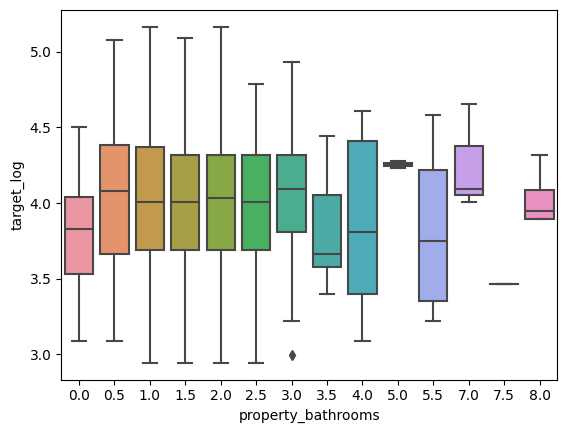

In [68]:
sns.boxplot(data=df_train, x='property_bathrooms', y='target_log')

In [69]:
df_train.property_bathrooms.value_counts()

1.0    5113
1.5     462
2.0     440
0.5      73
2.5      41
3.0      33
0.0      11
4.0       9
3.5       6
8.0       4
5.5       4
7.0       3
5.0       2
7.5       1
Name: property_bathrooms, dtype: int64

The bathrooms column will be dropped because it has too many observations with the same value, and other features capture the same variance that it captures (bedrooms, beds, etc.)

---
## Check the number of clusters for the location

In [70]:
from utils.transformers import KMeansClusterer
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='property_lon', ylabel='property_lat'>

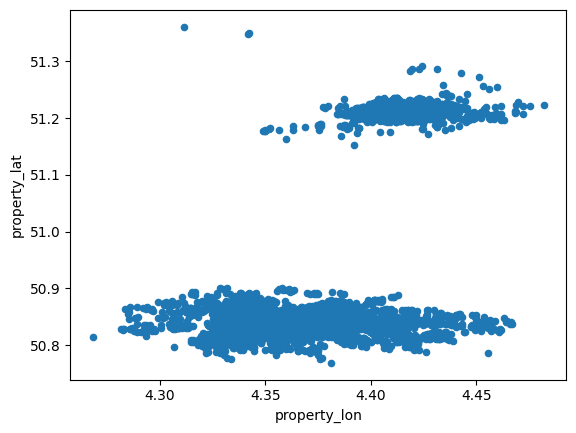

In [71]:
df_train.plot(x='property_lon', y='property_lat', kind='scatter')

In [72]:
lat = df_train['property_lat']

lon = df_train['property_lon']

In [73]:
clust = KMeansClusterer(
    n_clusters=7,
    features_cluster=['property_lat', 'property_lon'],
    initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ]))

In [74]:
df_temp_kmeans = df_train[['property_lat', 'property_lon']].copy()
zone_kmeans = clust.fit_transform(df_temp_kmeans)

In [75]:
from utils.transformers import GaussianClusterer
clust_gauss = GaussianClusterer(
    n_clusters=7,
    features_cluster=['property_lat', 'property_lon'],
    initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ]))

In [76]:
df_temp_gauss = df_train[['property_lat', 'property_lon']].copy()
zones_gauss = clust_gauss.fit_transform(df_temp_gauss)

Text(0.5, 1.0, '7 Clusters with Kmeans')

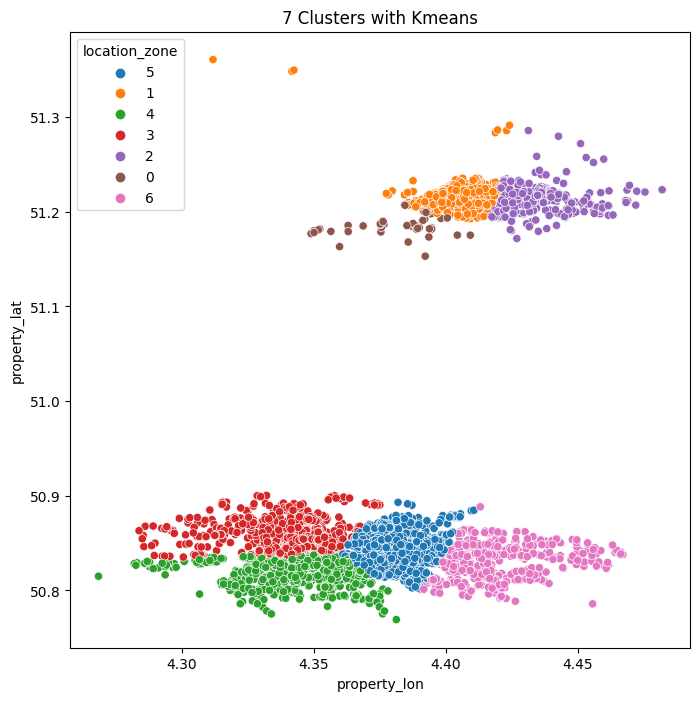

In [77]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=lon, y=lat, hue=zone_kmeans['location_zone'])
plt.title('7 Clusters with Kmeans')

Text(0.5, 1.0, '7 Clusters with Gaussian Mixture Model')

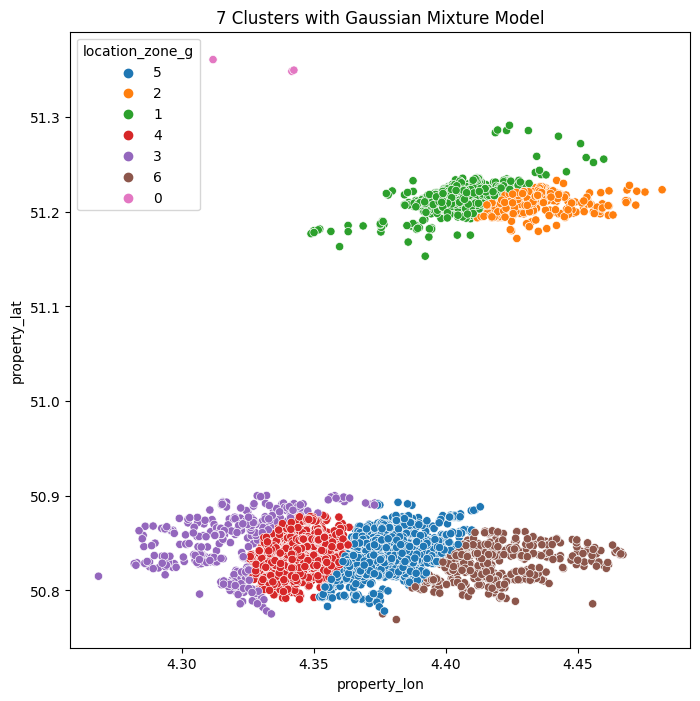

In [78]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=lon, y=lat, hue=zones_gauss['location_zone_g'])
plt.title('7 Clusters with Gaussian Mixture Model')

The idea behind this clustering is to separate the locations in different categorical zones. It is known that places closer to the city centers will generally be more expensive than ones that are further away, so the idea was to create clusters that would separate between closer and further from the center. We tested two approaches, using a Kmeans model and a Gaussian Mixture model. The number of clusters were chosen based on the idea explained above, after observing the distribution of the Airbnbs. The initial positions of the centroids were chosen by us so the model could better capture the separation between center and suburb.

From the two plots, it can be seen that the Gaussian Mixture model better separates between city center and further away, so it will be chosen over the Kmeans model.

---
## Check the PCA for the reviews and booking available features

In this part we will apply all the feature transformers until the PCA, and apply the PCA separately in order to analyse how many components should be used. There is a need to run the other feature transformers first specially because of the Imputer, Scaler and encoding(the imputer requires numerical data) transformers, which need to be used before the PCA.

In [79]:
# Reset the Train Dataframe
df_train = pd.read_csv('train.csv')

In [87]:
from sklearn.pipeline import Pipeline

pipe_features = Pipeline(steps=[
    ('col_dropper',
     ColumnDropper(
        columns_to_drop=[
            'property_id',
            'property_name',
            'host_id',
            'host_location',
            'host_since',
            'host_nr_listings_total',
            'host_response_time',
            'property_desc',
            'property_last_updated',
            'property_scraped_at',
            'property_zipcode',
            'property_sqfeet', 
            'property_neighborhood',
            'property_notes',
            'property_transit', 
            'property_access',
            'property_interaction',
            'property_rules',
            'reviews_first',
            'reviews_last',
            'property_amenities',
            'host_about',
            'host_verified',
            'property_bathrooms',
            'property_bed_type',
            'property_summary'
            ]
        )
     ),
     ('target_handler',
      TargetHandler(target_col='target')
      ),
    ('missing_flagger',
     MissingFlagger(
        columns_to_flag=[
            'property_space'   
            ]
        )
     ),
    ('extras_handler',
     ExtrasHandler()
     ),
    ('clust_location',
     GaussianClusterer(
        n_clusters=7,
        features_cluster=['property_lat', 'property_lon'],
        initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ])
        )
     ),
    ('property_type_handler',
     PropertyTypeHandler()
     ),
    ('booking_cancel_handler',
     BookingCancelHandler()
     ),
     ('max_guest_adjuster',
      MaxGuestsAdjuster()
      ),
     ('median_imputer',
      CustomSimpleImputer(
        columns=[
            'property_bedrooms',
            'property_beds',
            'host_response_rate',
            'host_nr_listings',
            'reviews_rating',
            'reviews_acc',
            'reviews_cleanliness',
            'reviews_checkin',
            'reviews_communication',
            'reviews_location',
            'reviews_value',
            'reviews_per_month'
        ])
      ),
    ('truncator',
      CustomTruncator(
        cols_and_lims={
            'property_beds':7,
            'property_bedrooms':4,
            'property_max_guests':7,
            'booking_price_covers':4
        }
      )
     ),
    ('target_encoding',
     CustomTargetEncoder(
        feat_columns=[
            'property_beds',
            'property_bedrooms',
            'property_max_guests',
            'booking_price_covers',
            'property_type_new',
            'property_room_type',
            'location_zone_g',
            'booking_cancel_policy'
        ],
        target_column='target'
     )
     ),
    ('target_col_drop',
      ColumnDropper(columns_to_drop=['target'])
      ),
    ('scaler',
     CustomStandardScaler(
        columns=[
            'host_response_rate',
            'host_nr_listings',
            'booking_min_nights',
            'booking_max_nights',
            'booking_availability_30',
            'booking_availability_60',
            'booking_availability_90',
            'booking_availability_365',
            'reviews_num',
            'reviews_rating',
            'reviews_acc',
            'reviews_cleanliness',
            'reviews_checkin',
            'reviews_communication',
            'reviews_location',
            'reviews_value',
            'reviews_per_month'
        ]
     ))
])

In [88]:
df_train_pca = pipe_features.fit_transform(df_train)

In [91]:
pca = PCA()

In [94]:
pca.fit(
    df_train_pca[[
        'reviews_rating',
        'reviews_acc',
        'reviews_cleanliness',
        'reviews_checkin',
        'reviews_communication',
        'reviews_location',
        'reviews_value']])

PCA()

In [95]:
pca.explained_variance_ratio_

array([0.59704866, 0.11692488, 0.10008488, 0.06194093, 0.05248807,
       0.04056611, 0.03094647])

In [98]:
pca.explained_variance_ratio_[:3].sum()

0.8140584223461104

For the PCA, the number of components that will be chosen is 3, as it explains 83% of the variance in the reviews features.

In [99]:
pca2 = PCA()

In [100]:
pca2.fit(df_train_pca[[
        'booking_availability_30',
        'booking_availability_60',
        'booking_availability_90',
        'booking_availability_365']])

PCA()

In [101]:
pca2.explained_variance_ratio_

array([0.83434744, 0.13129678, 0.02992575, 0.00443003])

For the bookings variable, the first component already explains 83% of the variance, so only that will be chosen

---
## Analysing the Final Dataset

We will apply the final data preprocessing pipeline and verify the data, plotting a correlation heatmap.

In [143]:
df_train_final.location_zone_g.value_counts()

-0.049415    2385
-0.046836    1963
-0.034894     716
-0.060205     481
-0.131287     350
-0.048432     315
-0.013637       3
Name: location_zone_g, dtype: int64

In [102]:
pipe_features = Pipeline(steps=[
    ('col_dropper',
     ColumnDropper(
        columns_to_drop=[
            'property_id',
            'property_name',
            'host_id',
            'host_location',
            'host_since',
            'host_nr_listings_total',
            'host_response_time',
            'property_desc',
            'property_last_updated',
            'property_scraped_at',
            'property_zipcode',
            'property_sqfeet', 
            'property_neighborhood',
            'property_notes',
            'property_transit', 
            'property_access',
            'property_interaction',
            'property_rules',
            'reviews_first',
            'reviews_last',
            'property_amenities',
            'host_about',
            'host_verified',
            'property_bathrooms',
            'property_bed_type',
            'property_summary'
            ]
        )
     ),
     ('target_handler',
      TargetHandler(target_col='target')
      ),
    ('missing_flagger',
     MissingFlagger(
        columns_to_flag=[
            'property_space'   
            ]
        )
     ),
    ('extras_handler',
     ExtrasHandler()
     ),
    ('clust_location',
     GaussianClusterer(
        n_clusters=7,
        features_cluster=['property_lat', 'property_lon'],
        initial_centroids = np.array([
            [51.24, 4.34], [51.20, 4.41], [51.20, 4.45],
            [50.85, 4.30], [50.85, 4.35], [50.85, 4.38], [50.85, 4.43]
            ])
        )
     ),
    ('property_type_handler',
     PropertyTypeHandler()
     ),
    ('booking_cancel_handler',
     BookingCancelHandler()
     ),
     ('max_guest_adjuster',
      MaxGuestsAdjuster()
      ),
     ('median_imputer',
      CustomSimpleImputer(
        columns=[
            'property_bedrooms',
            'property_beds',
            'host_response_rate',
            'host_nr_listings',
            'reviews_rating',
            'reviews_acc',
            'reviews_cleanliness',
            'reviews_checkin',
            'reviews_communication',
            'reviews_location',
            'reviews_value',
            'reviews_per_month'
        ])
      ),
    ('truncator',
      CustomTruncator(
        cols_and_lims={
            'property_beds':7,
            'property_bedrooms':4,
            'property_max_guests':7,
            'booking_price_covers':4
        }
      )
     ),
    ('target_encoding',
     CustomTargetEncoder(
        feat_columns=[
            'property_beds',
            'property_bedrooms',
            'property_max_guests',
            'booking_price_covers',
            'property_type_new',
            'property_room_type',
            'location_zone_g',
            'booking_cancel_policy'
        ],
        target_column='target'
     )
     ),
    ('scaler',
     CustomStandardScaler(
        columns=[
            'host_response_rate',
            'host_nr_listings',
            'booking_min_nights',
            'booking_max_nights',
            'booking_availability_30',
            'booking_availability_60',
            'booking_availability_90',
            'booking_availability_365',
            'reviews_num',
            'reviews_rating',
            'reviews_acc',
            'reviews_cleanliness',
            'reviews_checkin',
            'reviews_communication',
            'reviews_location',
            'reviews_value',
            'reviews_per_month'
        ]
     )),
    ('pca_reviews',
     PCATransformer(
        n_components=3,
        columns=[
            'reviews_rating',
            'reviews_acc',
            'reviews_cleanliness',
            'reviews_checkin',
            'reviews_communication',
            'reviews_location',
            'reviews_value'
        ]
     )),
     ('pca_bookings',
      PCATransformer(
        n_components=1,
        columns=[
            'booking_availability_30',
            'booking_availability_60',
            'booking_availability_90',
            'booking_availability_365'
            ]
     ))
])

In [103]:
df_train_final = pipe_features.fit_transform(df_train)

In [104]:
(df_train_final.isna().sum() > 0).sum()

0

<Axes: >

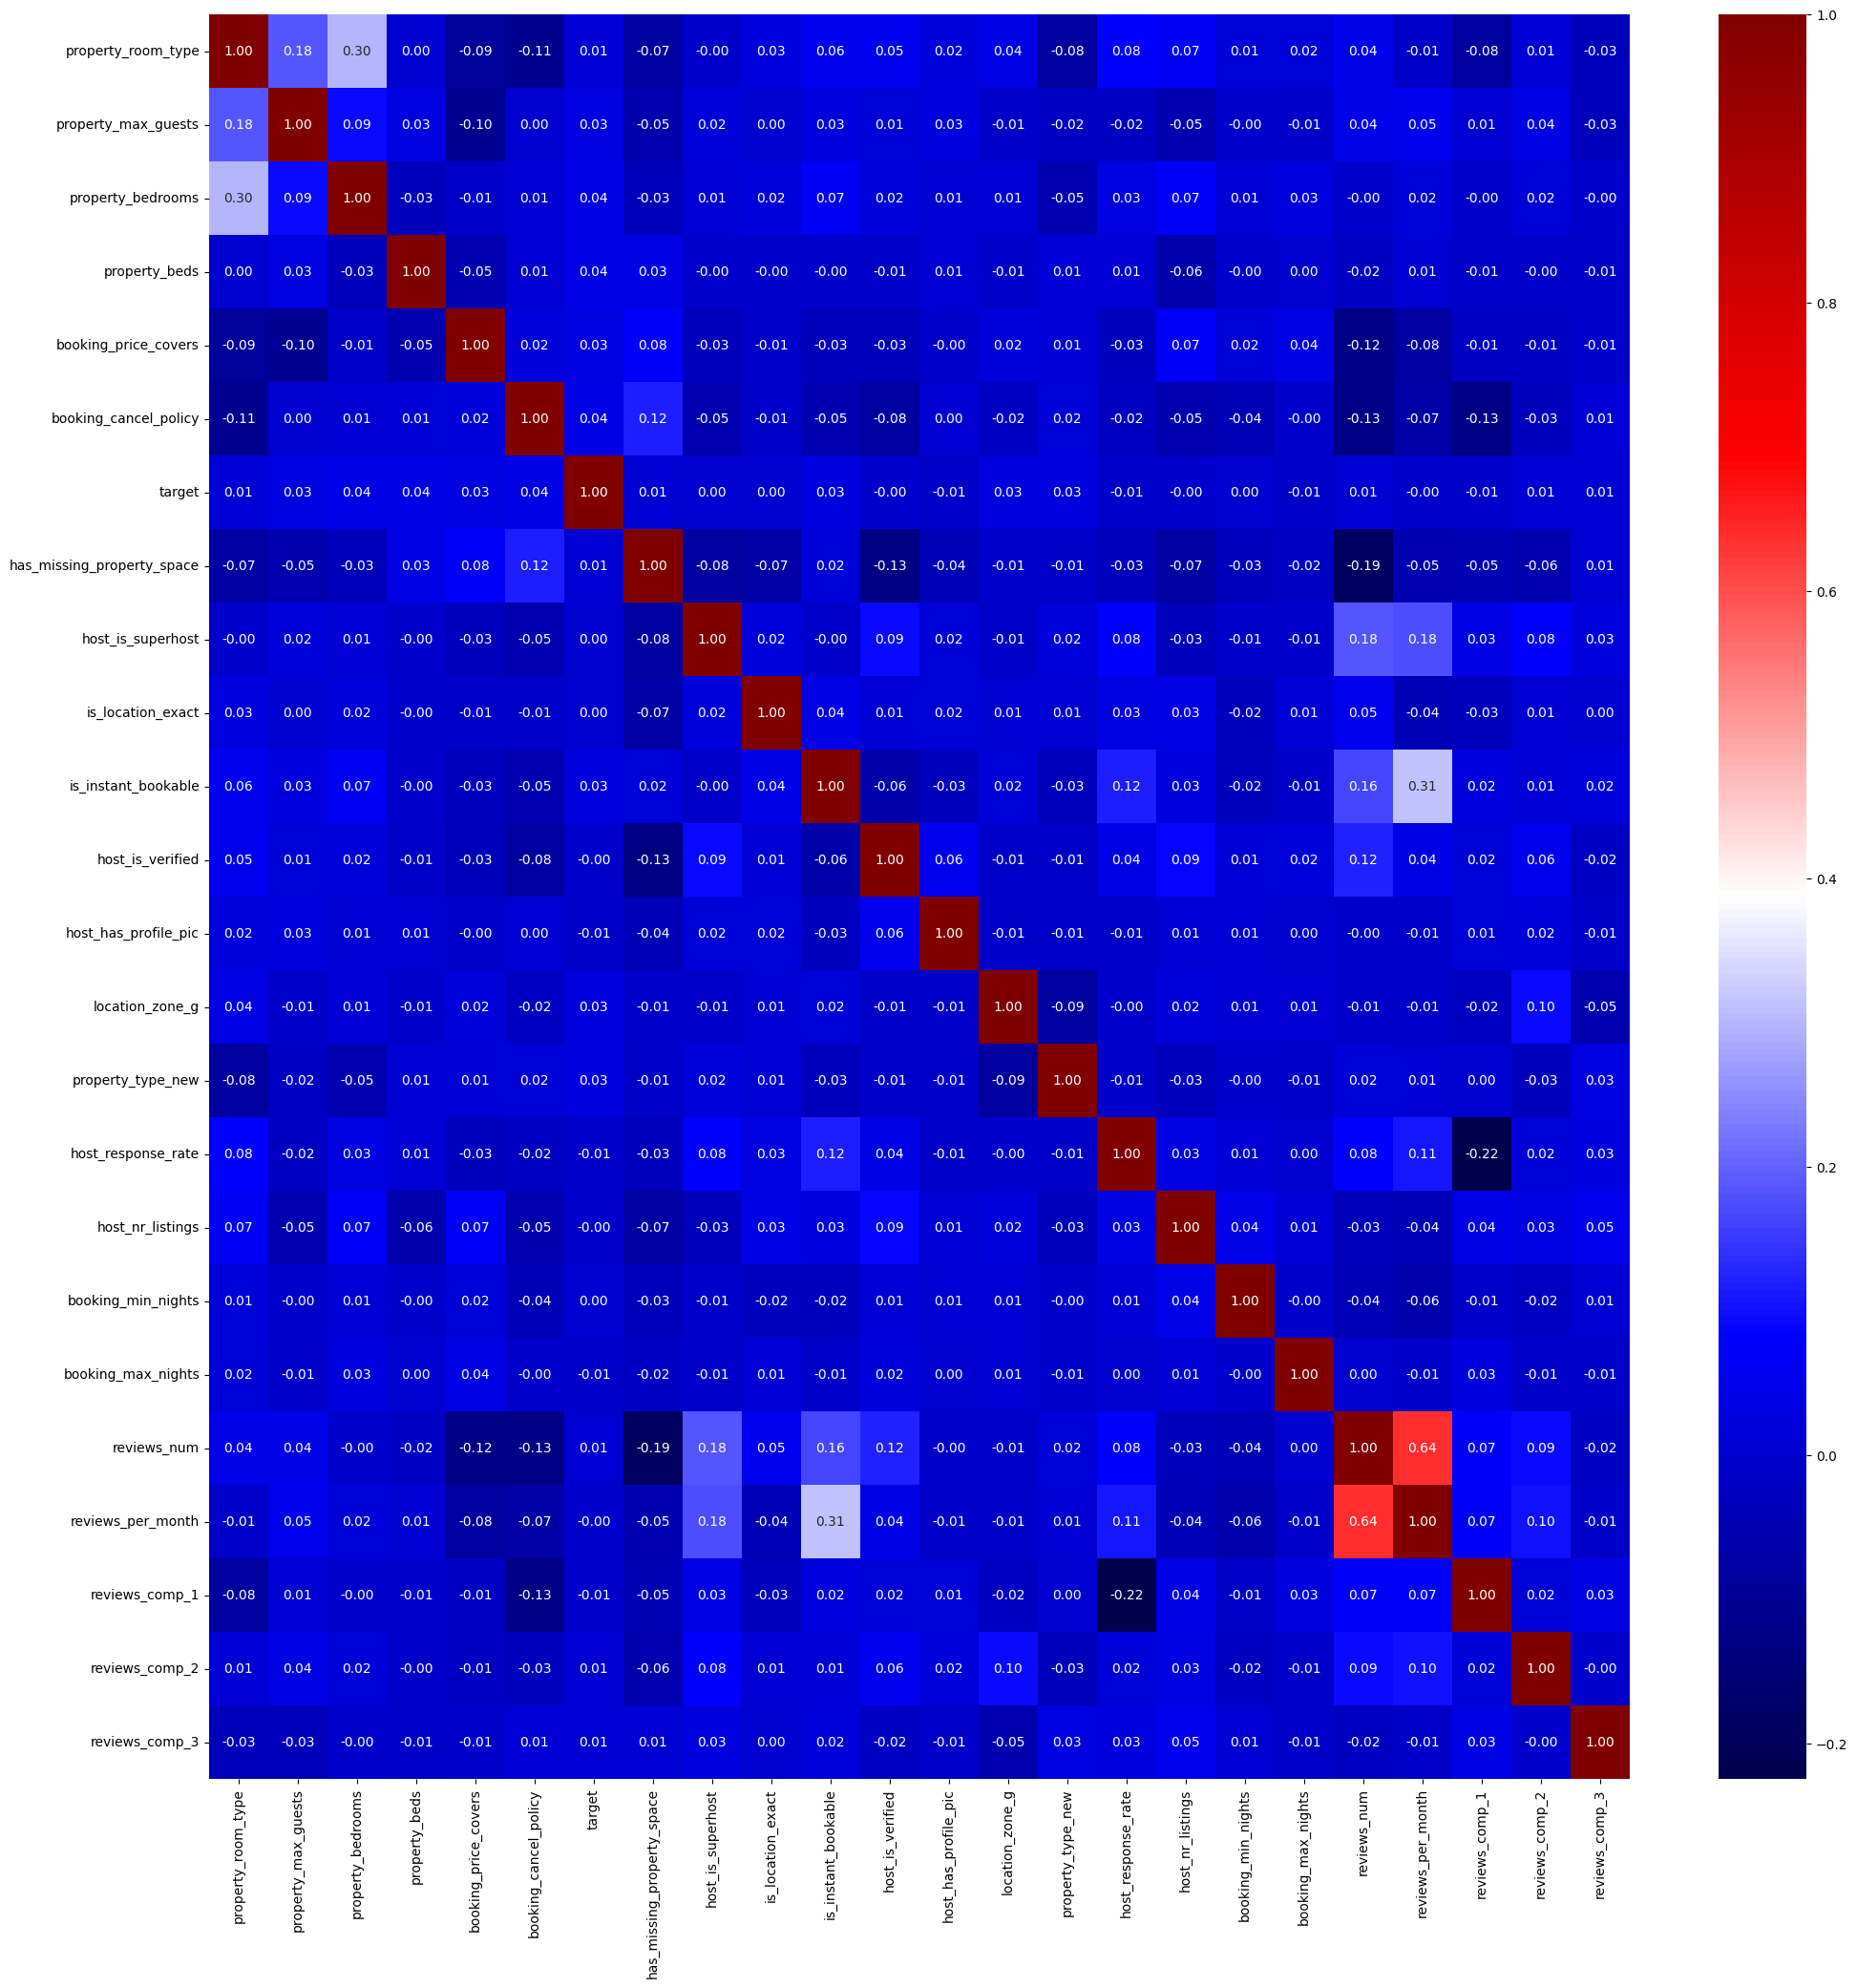

In [105]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train_final.corr(), annot=True, fmt=".2f", cmap="seismic")

In [135]:
iso_forest = IsolationForest()

# Columns to check outliers in the price
# cols = [
#     'property_beds',
#     'property_room_type',
#     'booking_price_covers'
# ]


pred_outlier = iso_forest.fit_predict(df_train_final)

In [136]:
df_train_final['pred_outlier'] = pred_outlier

In [137]:
df_train_final['pred_outlier'].value_counts()

 1    5264
-1     949
Name: pred_outlier, dtype: int64

<Axes: xlabel='pred_outlier', ylabel='target'>

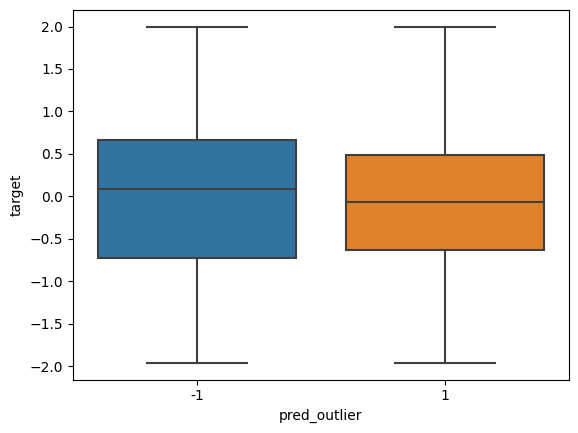

In [138]:
sns.boxplot(data=df_train_final, x='pred_outlier', y='target')

<Axes: >

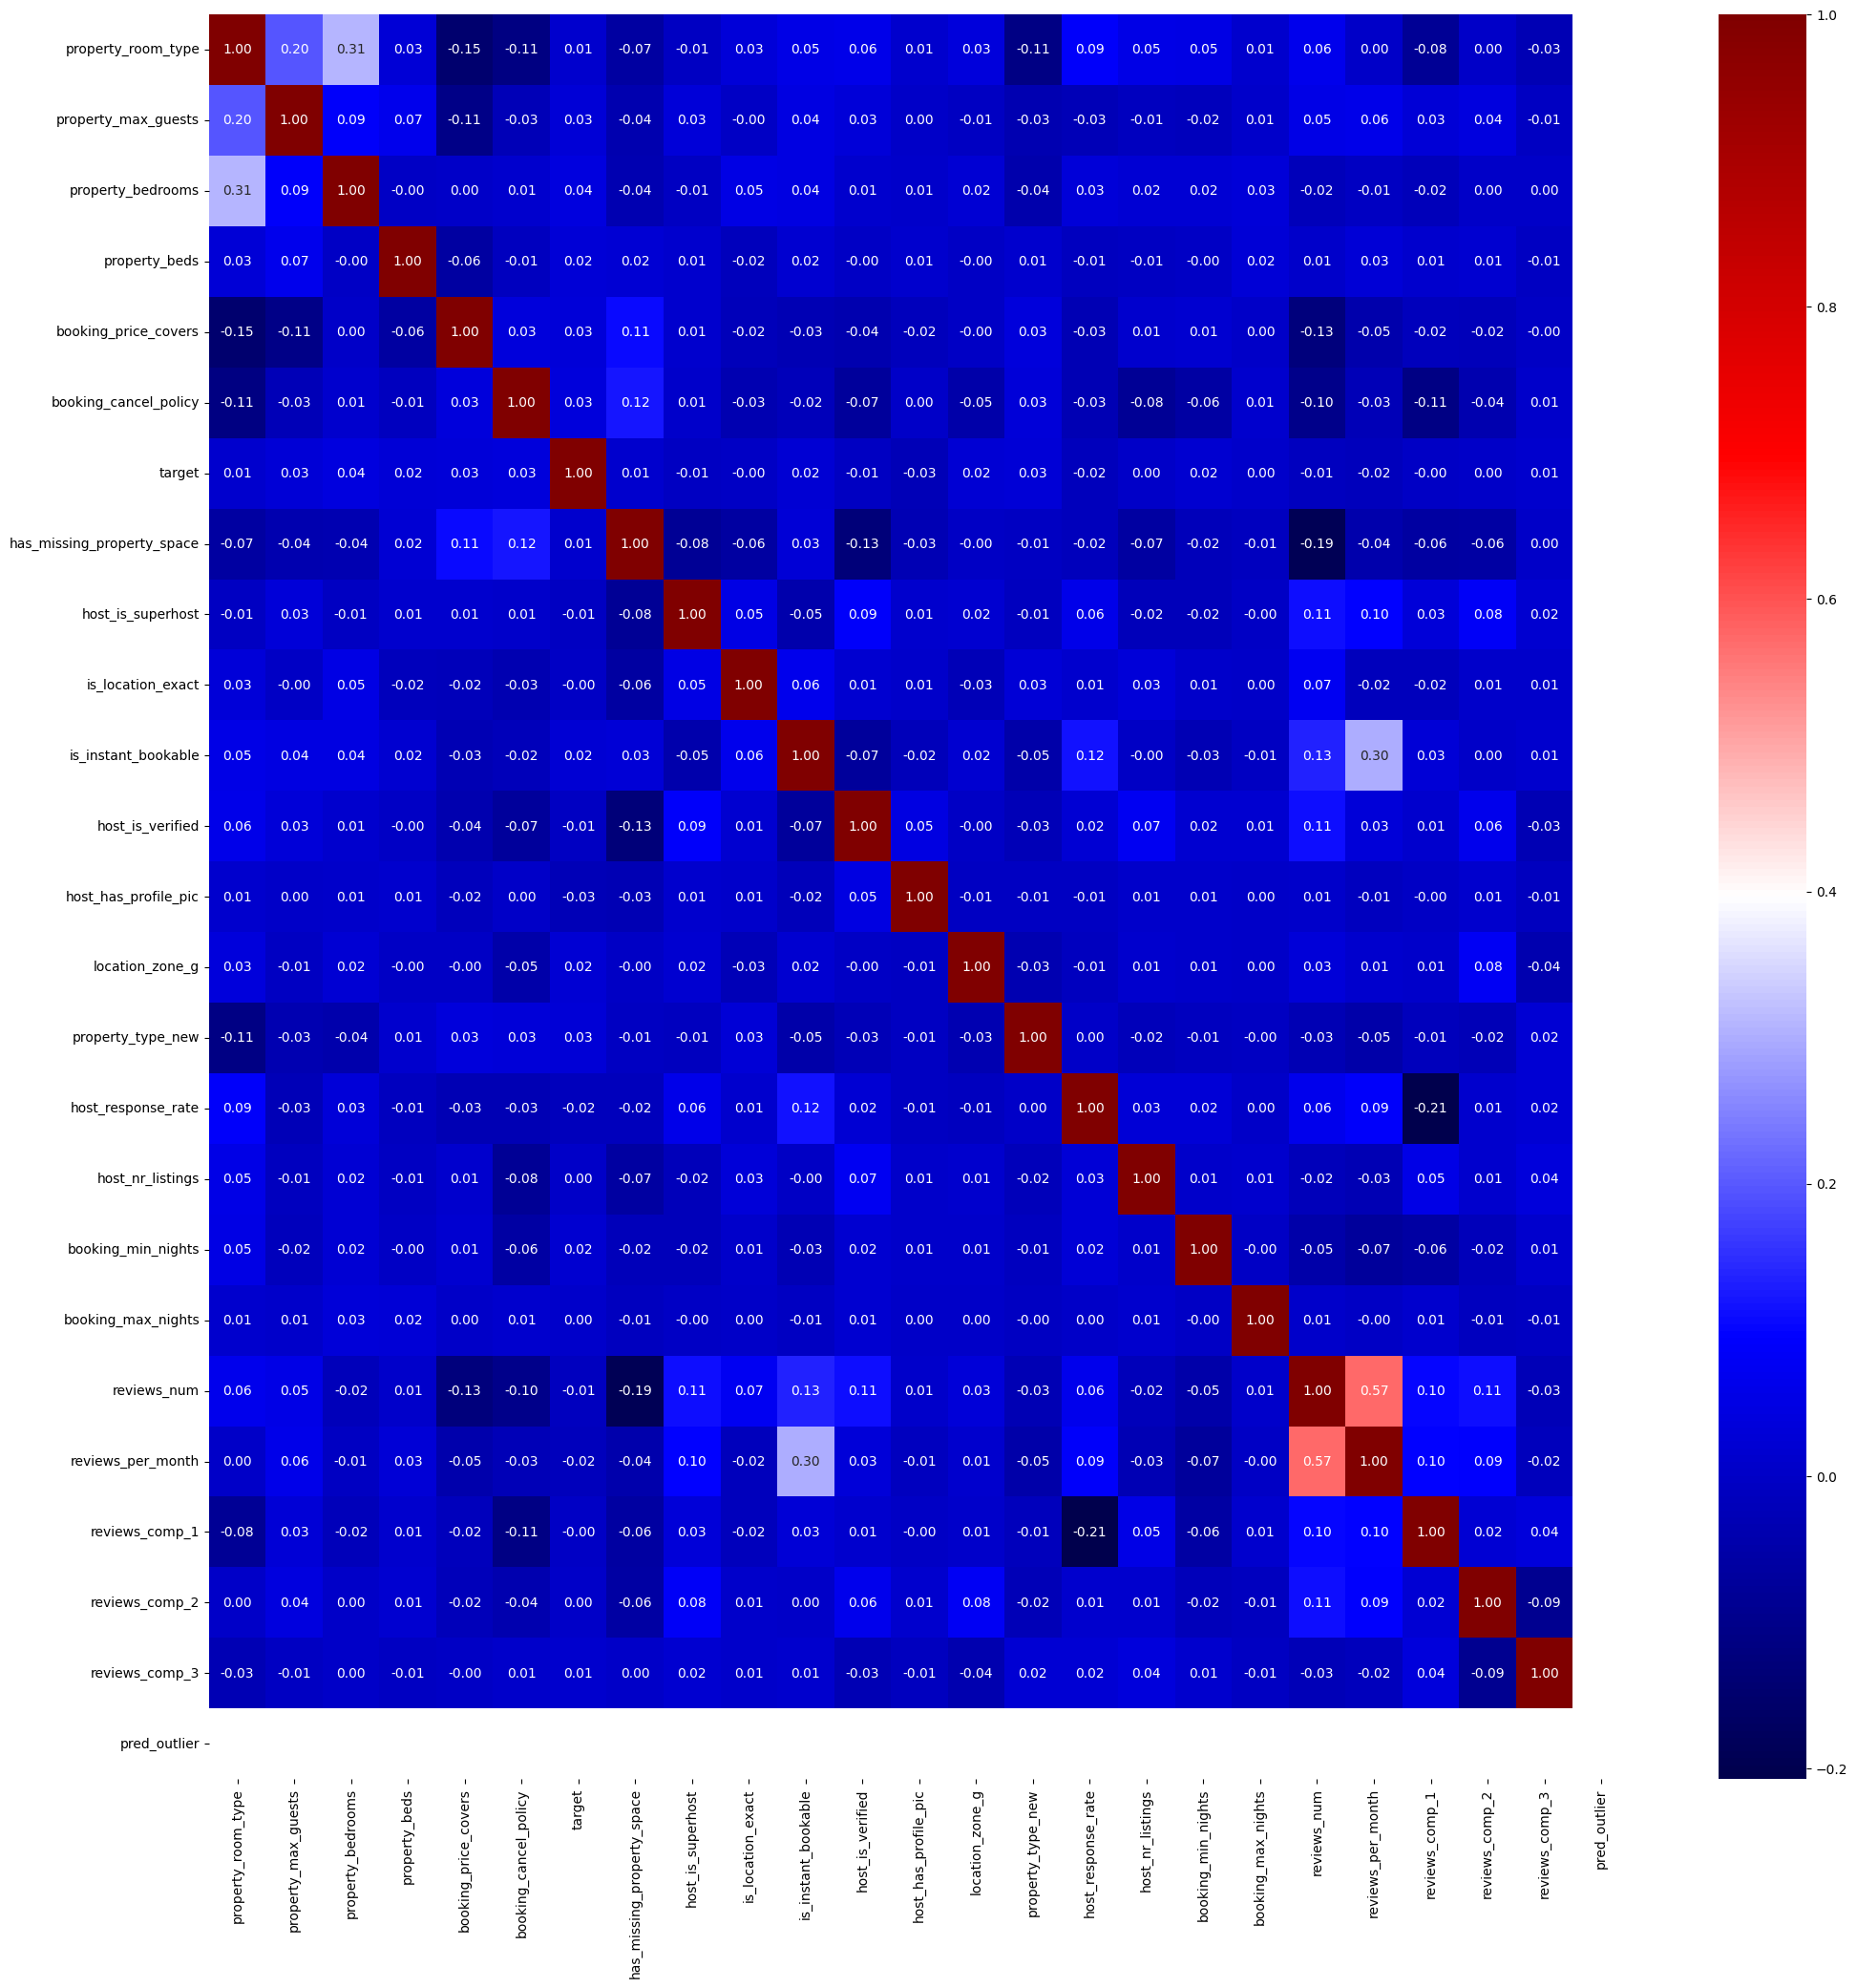

In [139]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train_final[df_train_final.pred_outlier == 1].corr(), annot=True, fmt=".2f", cmap="seismic")

<Axes: >

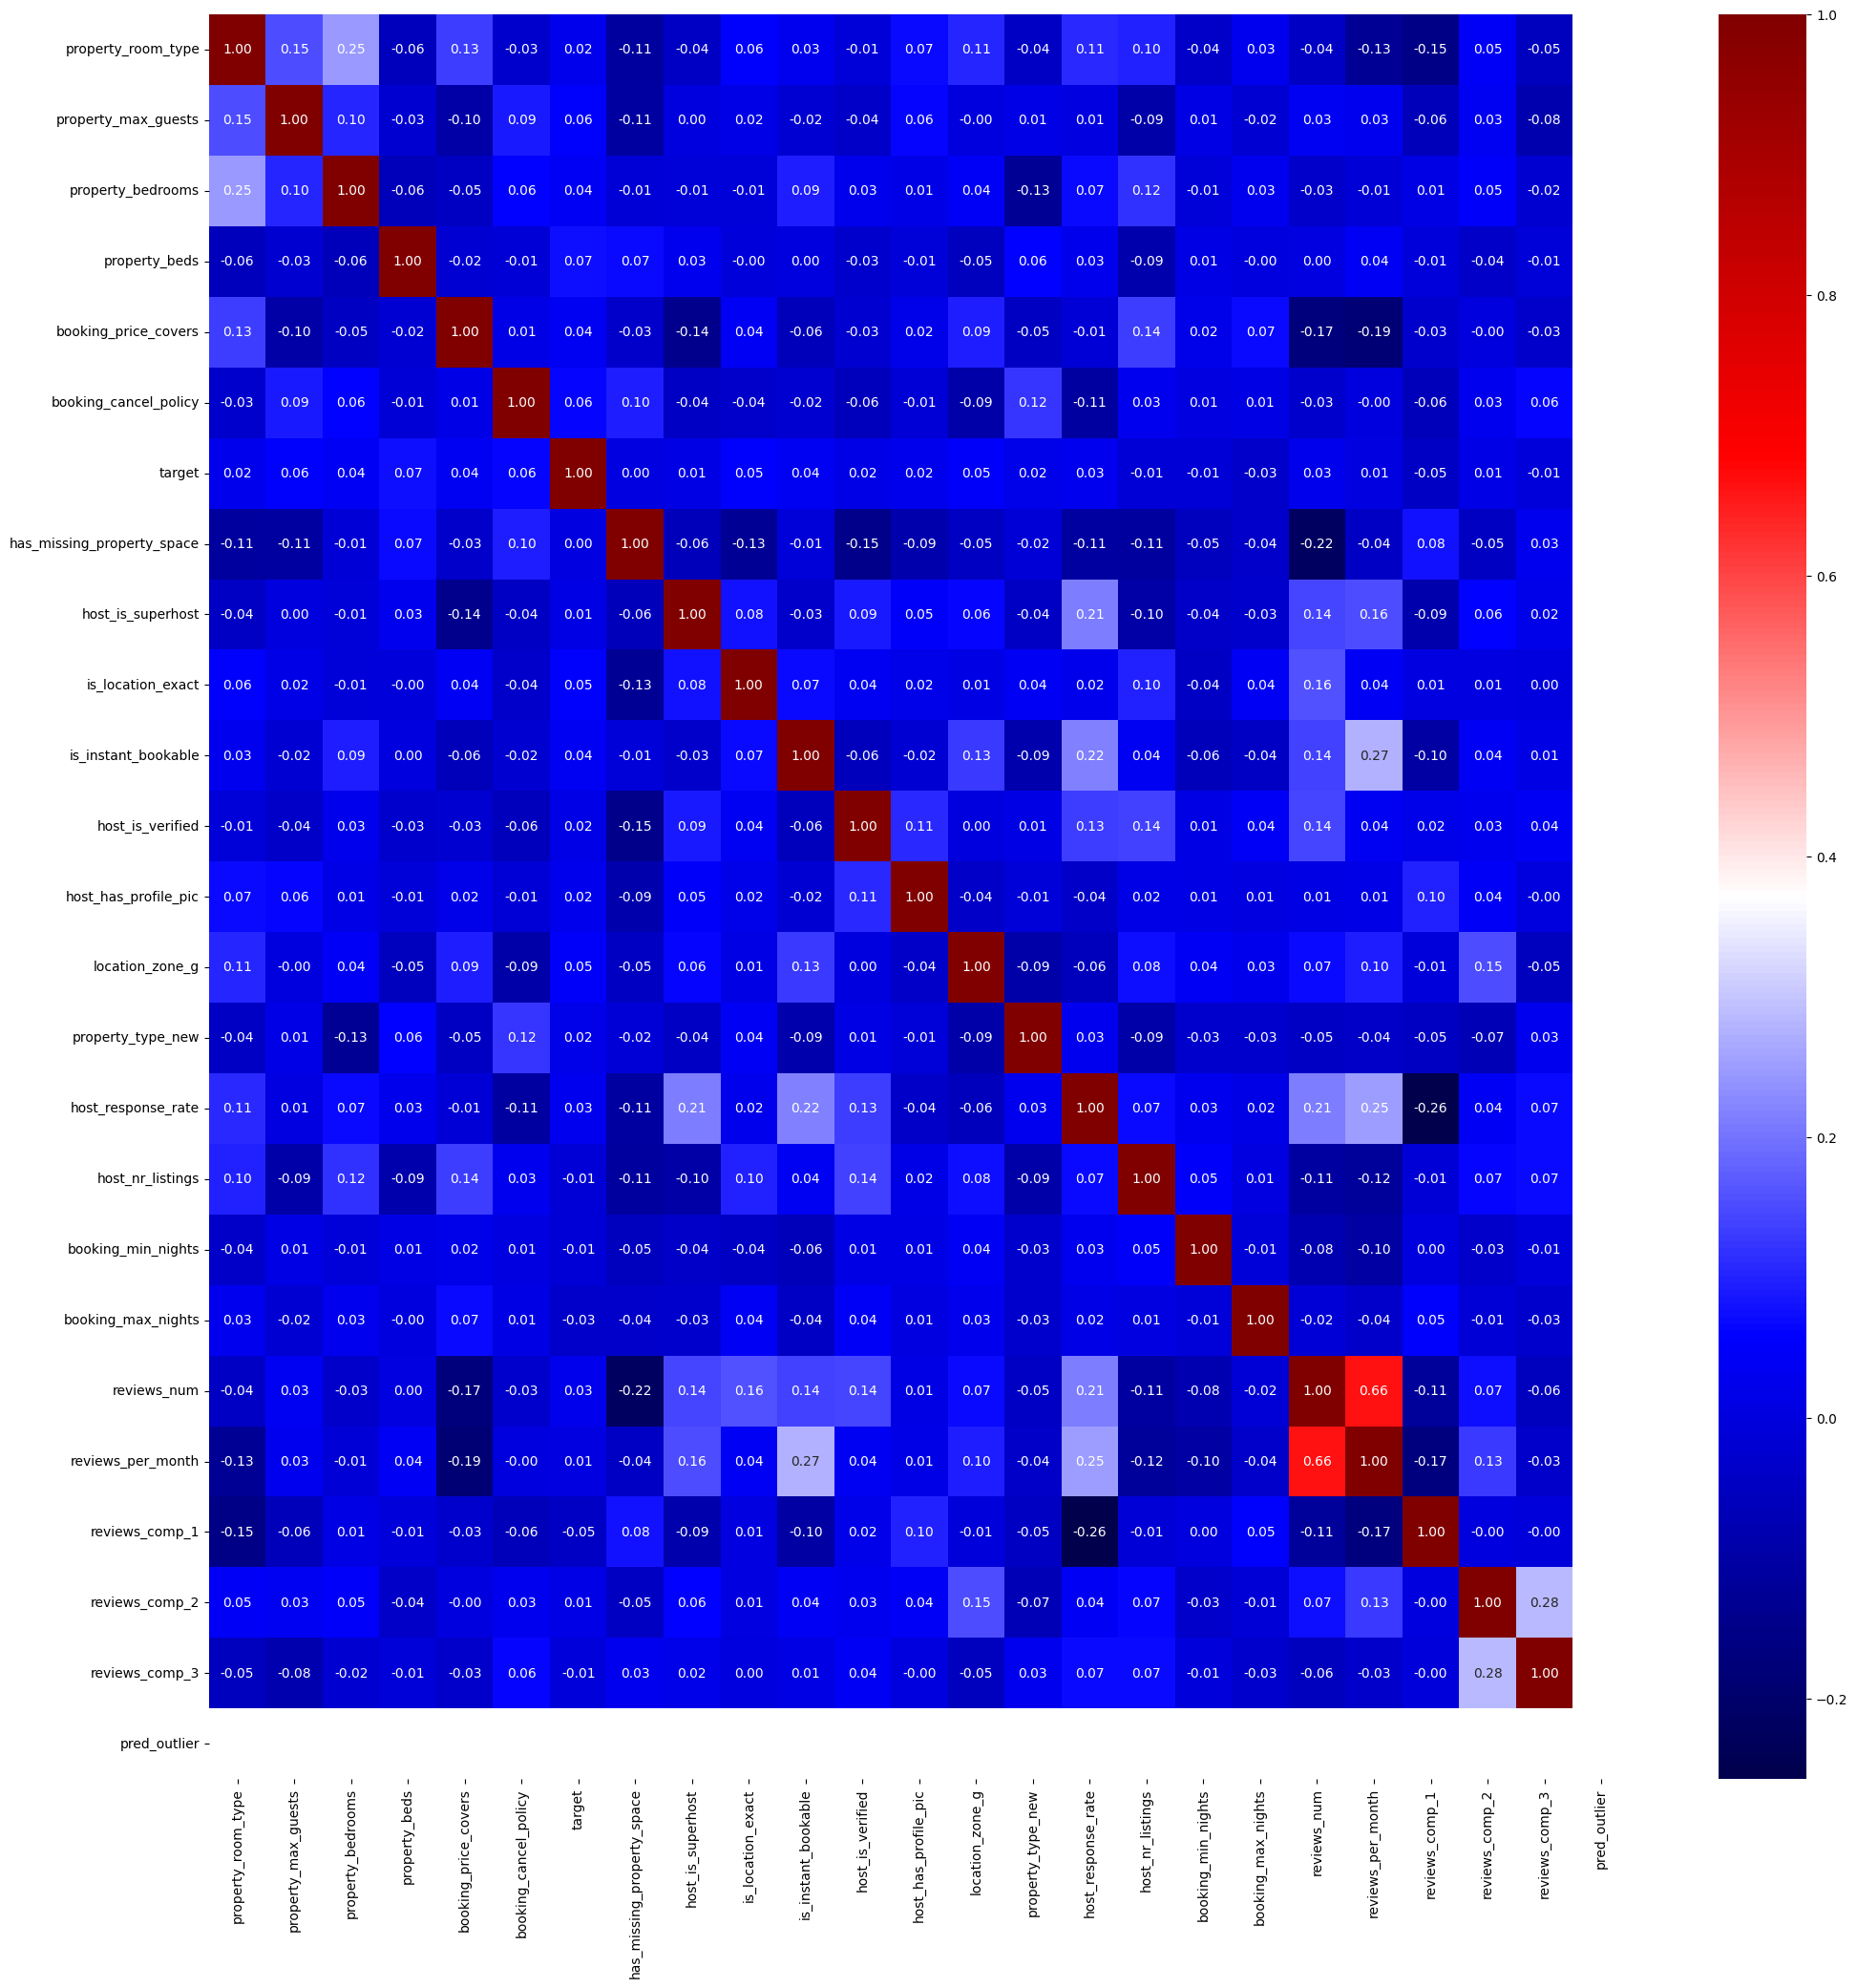

In [140]:
plt.figure(figsize=(24,24))
sns.heatmap(df_train_final[df_train_final.pred_outlier == -1].corr(), annot=True, fmt=".2f", cmap="seismic")